# Multidimensional Scaling

## 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import eig
%matplotlib inline

# 1. Base Distance example from class by *'hand'*
### Read in Base Distance Dataset

In [2]:
base = pd.read_csv("Base_Distances.csv")
base_array = base.to_numpy()
print(base_array)
print(base_array.shape)

[[   0.  2482.5 2415.1 2609.9 2273. ]
 [2482.5    0.   160.8  291.   774.3]
 [2415.1  160.8    0.   186.9  620.2]
 [2609.9  291.   186.9    0.   629. ]
 [2273.   774.3  620.2  629.     0. ]]
(5, 5)


### 1.0 Classical MDS (Slide 18)

1. Compute Q
2. Compute H
3. Compute B
4. Perform Eigen Decomposition on B
5. Calculate dimensions in lower dimensional space

### Compute Q

In [3]:
Q = np.zeros((5,5))

for i in range(len(base_array)):
    for j in range(len(base_array)):
        Q[i,j]=-1/2*base_array[i,j]*base_array[i,j]
        
print(Q)

[[      -0.    -3081403.125 -2916354.005 -3405789.005 -2583264.5  ]
 [-3081403.125       -0.      -12928.32    -42340.5    -299770.245]
 [-2916354.005   -12928.32        -0.      -17465.805  -192324.02 ]
 [-3405789.005   -42340.5     -17465.805       -0.     -197820.5  ]
 [-2583264.5    -299770.245  -192324.02   -197820.5         -0.   ]]


### Compute H

In [4]:
I = np.identity(len(base_array))
ones = np.ones((len(base_array),1))

H = I - 1/len(base_array)*np.dot(ones,ones.T)
print(H)

[[ 0.8 -0.2 -0.2 -0.2 -0.2]
 [-0.2  0.8 -0.2 -0.2 -0.2]
 [-0.2 -0.2  0.8 -0.2 -0.2]
 [-0.2 -0.2 -0.2  0.8 -0.2]
 [-0.2 -0.2 -0.2 -0.2  0.8]]


### Compute B

In [5]:
B=H@Q@H
print(B)

[[ 3774767.452 -1016709.362  -911134.25  -1295700.518  -551223.322]
 [-1016709.362   354620.074   282217.746   357674.298    22197.244]
 [ -911134.25    282217.746   235672.058   323074.985    70169.461]
 [-1295700.518   357674.298   323074.985   445409.522   169541.713]
 [ -551223.322    22197.244    70169.461   169541.713   289314.904]]


### Eigen Decomposition of B

In [6]:
eVals,eVecs=eig(B)
Lambda=np.diag(eVals)
print('Lambda:')
print(np.array_str(Lambda, precision=1, suppress_small=True))

Lambda:
[[4796369.        0.        0.        0.        0. ]
 [      0.   303895.        0.        0.        0. ]
 [      0.        0.    -6733.4       0.        0. ]
 [      0.        0.        0.        0.        0. ]
 [      0.        0.        0.        0.     6253.4]]


In [7]:
print('E-vector:') 
print(eVecs)

E-vector:
[[ 0.88687779  0.08477939  0.06240323 -0.4472136  -0.04864239]
 [-0.24187823  0.48345537  0.12292884 -0.4472136   0.70189339]
 [-0.21565864  0.22524012 -0.74524675 -0.4472136  -0.38388218]
 [-0.30485707  0.04685531  0.64659708 -0.4472136  -0.53551747]
 [-0.12448384 -0.84033019 -0.08668241 -0.4472136   0.26614865]]


### Find coordinates in lower dimension

In [8]:
V=eVecs[:,0:2]
print(V)

[[ 0.88687779  0.08477939]
 [-0.24187823  0.48345537]
 [-0.21565864  0.22524012]
 [-0.30485707  0.04685531]
 [-0.12448384 -0.84033019]]


In [9]:
L=Lambda[0:2,0:2]
print(L)

[[4796368.97839347       0.        ]
 [      0.          303894.99583098]]


In [10]:
X = V@np.sqrt(L)
print(np.array_str(X, precision=1, suppress_small=True))

[[1942.3   46.7]
 [-529.7  266.5]
 [-472.3  124.2]
 [-667.7   25.8]
 [-272.6 -463.2]]


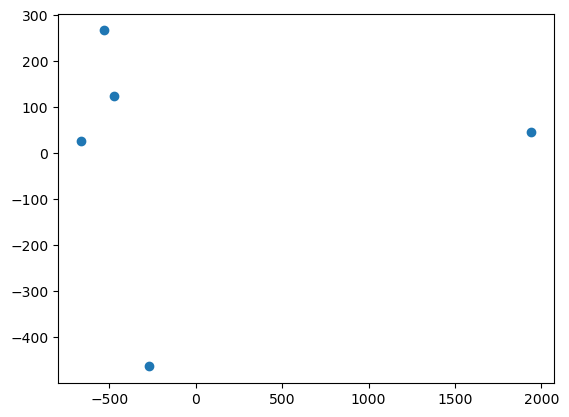

In [11]:
plt.scatter(X[:,0], X[:,1])

# 2. Olivetti Faces Example using Scikit Learn
Roughly follows tutorial found here: https://stackabuse.com/guide-to-multidimensional-scaling-in-python-with-scikit-learn/ <br>
Uses the Olivetti faces dataset: https://scikit-learn.org/0.19/datasets/olivetti_faces.html <br>
Scikit Learn MDS documentation is here: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html <br>
A nice MDS tutorial, albiet in R: http://www.flutterbys.com.au/stats/tut/tut15.1.html

In [12]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
from skimage.io import imshow
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline

In [13]:
faces = dt.fetch_olivetti_faces()

In [14]:
X_faces = faces.data
X_images = faces.images
y_faces = faces.target
ind = y_faces < 4
X_faces = X_faces[ind,:]
y_faces = y_faces[ind]

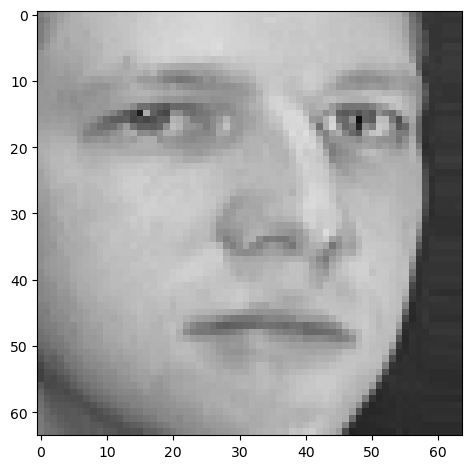

In [15]:
for n in list(range(5)):
    firstImage = X_images[n]
    imshow(firstImage) 

Sklearn's MDS has three fundemental steps:
1) Create, or provide an existing, distance matrix <br>
2) Fit the MDS model <br>
3) Output coordinates in the new lower dimension <br>

In [36]:
#1. Compute Distance matrix using euclidean distances
dist_euclid = euclidean_distances(X_faces)

#2. Create the MDS model
mds = MDS(metric=True, n_components=2, dissimilarity='precomputed', random_state=0)

#3. Get the embeddings
pts = mds.fit_transform(dist_euclid)

C:\Users\bcox\miniconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


#### Stress
If something doesn't make sense, sometimes thats because SKLearn isn't doing what you expect <br>
https://stackoverflow.com/questions/36428205/stress-attribute-sklearn-manifold-mds-python
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

In [37]:
## sklearn Stress
stress = mds.stress_
print("sklearn stress :")
print(mds.stress_)
print("")

sklearn stress :
7510.078122642248



This is just a helper function.  Essentially it is performing both an MDS and creating a scatter plot.

In [42]:
def mapData(dist_matrix, X, y, metric, title):
    mds = MDS(metric=metric, n_components=2, dissimilarity='precomputed', random_state=0)
    # Get the embeddings
    pts = mds.fit_transform(dist_matrix)
    # Plot the embedding, colored according to the class of the points
    fig = plt.figure(2, (15,6))
    ax = fig.add_subplot(1,2,1)    
    ax = sns.scatterplot(x=pts[:, 0], y=pts[:, 1],
                         hue=y, palette=['r', 'g', 'b', 'c'])

    # Add the second plot
    ax = fig.add_subplot(1,2,2)
    # Plot the points again
    plt.scatter(pts[:, 0], pts[:, 1])
    
    # Annotate each point by its corresponding face image
    for x, ind in zip(X, range(pts.shape[0])):
        im = x.reshape(64,64)
        imagebox = OffsetImage(im, zoom=0.4, cmap=plt.cm.gray)
        i = pts[ind, 0]
        j = pts[ind, 1]
        ab = AnnotationBbox(imagebox, (i, j), frameon=False)
        ax.add_artist(ab)
    plt.title(title)    
    plt.show()

### Metric MDS with Euclidean Distance
Let us consider the Olivetti face data by first creating a classicial metric distance matrix using Euclidean distances between the 64x64 pixel matrixes.

C:\Users\bcox\miniconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


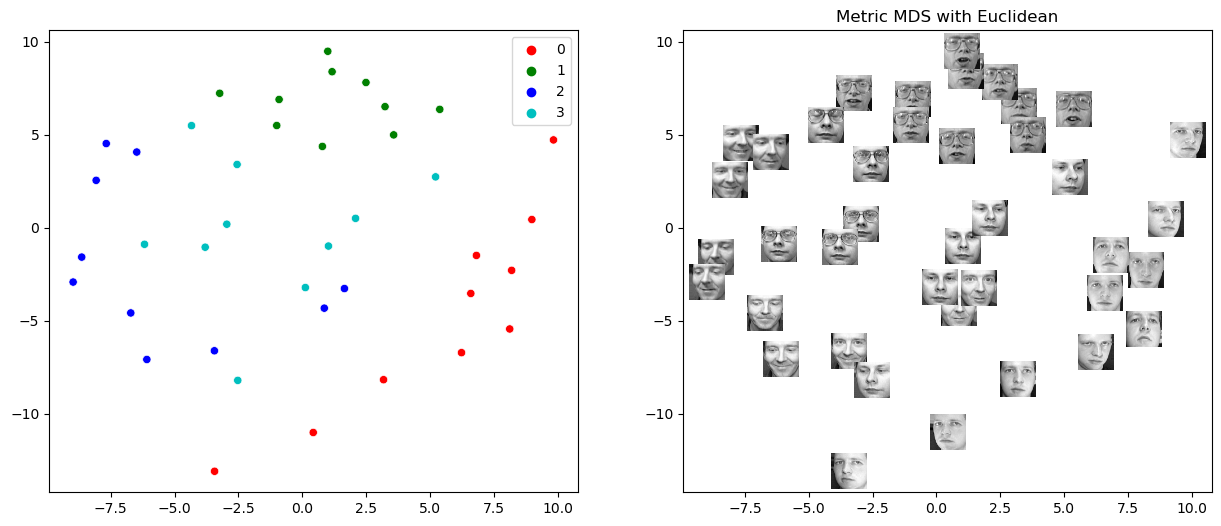

In [45]:
dist_euclid = euclidean_distances(X_faces)
mapData(dist_euclid, X_faces, y_faces, True, 
        'Metric MDS with Euclidean')

We note that each individuals face is clustered as being more similar to each other which is good.  To a lesser extend similar expressions (by individual) are also clustered.  

## Metric MDS, Manhattan Distance
We can replicate this using manhatten distances between each images greyscale values.

C:\Users\bcox\miniconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


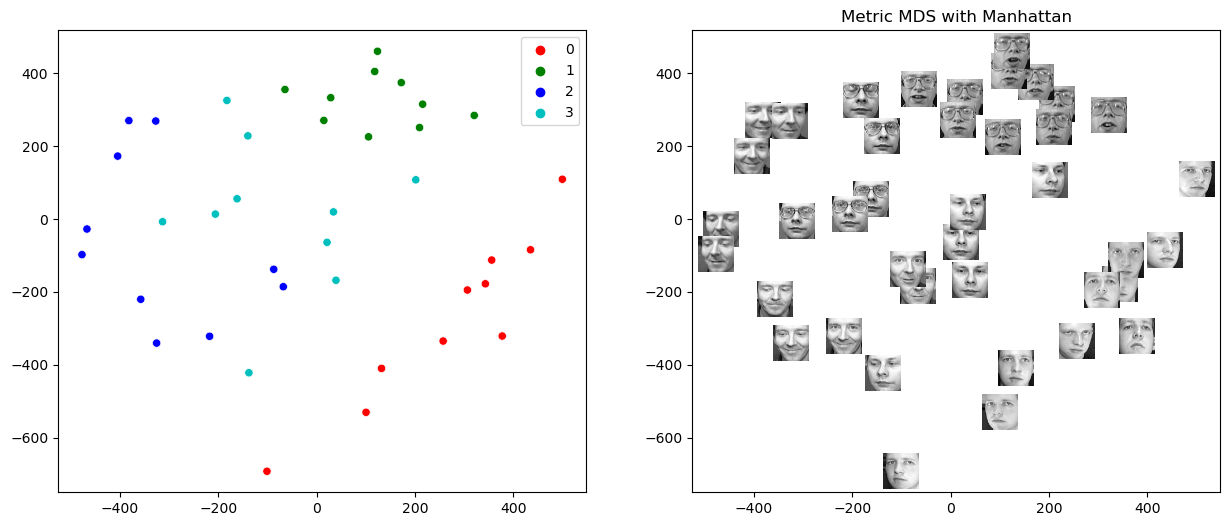

In [47]:
dist_manhattan = manhattan_distances(X_faces)
mapData(dist_manhattan, X_faces, y_faces, True, 
        'Metric MDS with Manhattan')

For the most part I would say these two distance measurements perform fairly similarly. 

### Non-metric MDS, Euclidean

C:\Users\bcox\miniconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


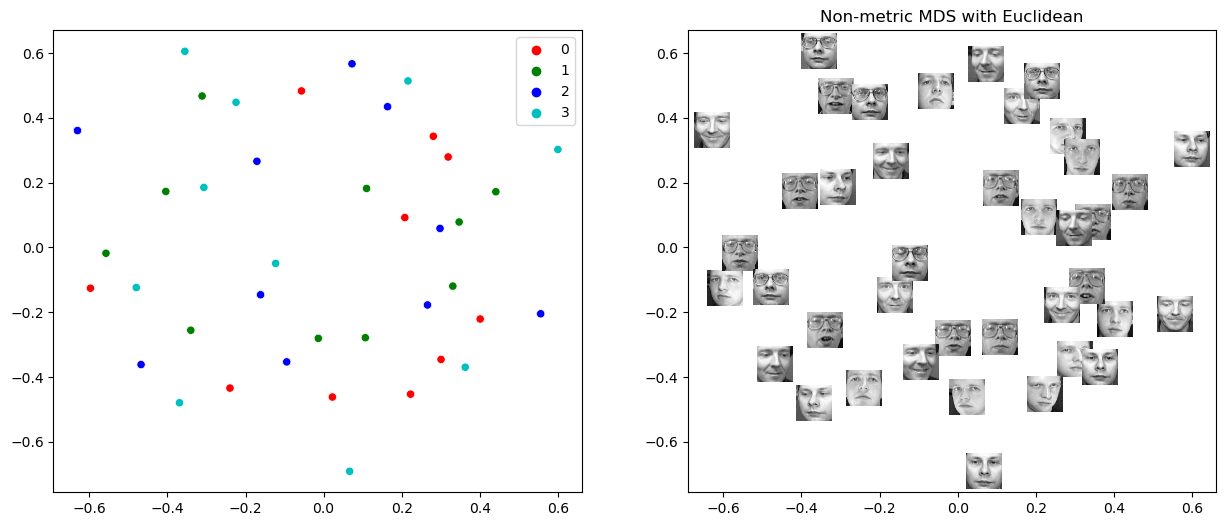

In [49]:
mapData(dist_euclid, X_faces, y_faces, False, 
        'Non-metric MDS with Euclidean')